## 샘플 데이터와 유사도 함수 실습

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. 유클리디안 유사도

- 유사도를 계산할 유저를 인덱스로 아이템을 컬럼으로 하는 데이터를 정의.
- 유저가 평가하지 않은 아이템에 대해서는 결측값으로 표시.

### 1.1 Sample Data

In [2]:
data = [
    [1., None, 1., None],
    [None, 1., 1., None],
    [1., None, 1., 1.,],
]

df = pd.DataFrame(
    data=data,
    index=['userA', 'userB', 'userC'],
    columns=['itemA', 'itemB', 'itemC', 'itemD'],
)

df

,itemA,itemB,itemC,itemD
userA,1.0,NaN,1.0,NaN
userB,NaN,1.0,1.0,NaN
userC,1.0,NaN,1.0,1.0


### 1.2 결측값 제거

결측값을 0으로 대체.

In [3]:
df = df.fillna(0)
df

,itemA,itemB,itemC,itemD
userA,1.0,0.0,1.0,0.0
userB,0.0,1.0,1.0,0.0
userC,1.0,0.0,1.0,1.0


### 1.3 유클리디안 유사도 계산

유저-아이템 평가 행렬에서 유저별로 유클리디안 유사도를 계산.

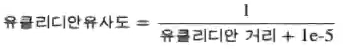

sklearn.metrics.pairwise의 euclidean_distance를 이용.

In [4]:
from sklearn.metrics.pairwise import euclidean_distances

In [5]:
euclidean_distances(
    X = df.loc[['userA']],
    Y = df.loc[['userB']],
)

array([[1.41421356]])

euclidean_distances에 X와 Y를 입력할 경우, X와 Y의 각 Row끼리 유클리디안 거리를 계산.

유저 A와 유저 B의 Row를 각각 X와 Y로 입력.

In [6]:
euclidean_distances(df)

array([[0.        , 1.41421356, 1.        ],
       [1.41421356, 0.        , 1.73205081],
       [1.        , 1.73205081, 0.        ]])

euclidean_distances에 X만 입력할 경우, X의 모든 Row사이의 유클리디안 거리를 계산.

전체 데이터를 입력할 경우 모든 유저 사이의 유클리디안 거리를 계산.

유클리디안 거리에 역수를 취해 유클리디안 유사도를 계산.

In [8]:
distance = euclidean_distances(df)
similarity = 1 / (distance + 1e-5) # 0의 역수가 무한대가 나오는 것을 방지.
similarity

array([[1.00000000e+05, 7.07101781e-01, 9.99990000e-01],
       [7.07101781e-01, 1.00000000e+05, 5.77346936e-01],
       [9.99990000e-01, 5.77346936e-01, 1.00000000e+05]])

## 2. 코사인 유사도

### 2.1 코사인 유사도 계산

sklearn.metrics.pairwise의 cosine_similarity를 이용.

In [9]:
from sklearn.metrics.pairwise import cosine_similarity

유클리디안 유사도 계산과 마찬가지로 X와 Y를 각각 입력하거나 X만 입력.

In [10]:
cosine_similarity(
    X = df.loc[['userA']],
    Y = df.loc[['userB']],
)

array([[0.5]])

모든 유저 사이의 코사인 유사도를 계산하기.

In [11]:
cosine_similarity(df)

array([[1.        , 0.5       , 0.81649658],
       [0.5       , 1.        , 0.40824829],
       [0.81649658, 0.40824829, 1.        ]])

## 3. 피어슨 유사도

### 3.1 Sample Data

In [12]:
data = [
    [4., 5., 4., 3.],
    [3., 4., 3., 2.],
    [4., 4., 5., 3.],
]

df = pd.DataFrame(
    data=data,
    index=['userA', 'userB', 'userC'],
    columns=['itemA', 'itemB', 'itemC', 'itemD'],
)

In [13]:
df

,itemA,itemB,itemC,itemD
userA,4.0,5.0,4.0,3.0
userB,3.0,4.0,3.0,2.0
userC,4.0,4.0,5.0,3.0


### 3.2 피어슨 유사도 계산

numpy.corrcoef는 데이터의 각 Row별로 유사도를 계산.

In [14]:
np.corrcoef(df)

array([[1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [0.5, 0.5, 1. ]])

### 3.3 코사인 유사도 계산

피어슨 유사도는 코사인 유사도에서 유저 또는 아이템의 특성을 제거한 값과 같다.

유저별로 선호도 평균을 계산하고, 기존 데이터에서 유저별 선호도를 제거.

    1. df.mean(axis=1) 은 각 행에 대해 평균을 계산.
    2. df1.sub(df2, axis=0) 은 인덱스를 기준으로 두 데이터의 차를 계산.

In [17]:
df.mean(axis=1) # 유저의 특성 = 유저의 평균.

userA    4.0
userB    3.0
userC    4.0
dtype: float64

In [15]:
user_mean = df.mean(axis=1)

df_sub = df.sub(user_mean, axis=0)

In [18]:
df_sub

,itemA,itemB,itemC,itemD
userA,0.0,1.0,0.0,-1.0
userB,0.0,1.0,0.0,-1.0
userC,0.0,0.0,1.0,-1.0


In [16]:
cosine_similarity(df_sub)

array([[1. , 1. , 0.5],
       [1. , 1. , 0.5],
       [0.5, 0.5, 1. ]])

cosine_similarity의 값과 pearson_similarity의 값이 동일.

## 4. 자카드 유사도

### 4.1 Sample Data

In [19]:
data = [
    [4., 0., 4., 3., 0.],
    [3., 4., 0., 2., 0.],
    [0., 0., 4., 5., 3.],
]

df = pd.DataFrame(
    data=data,
    index=['userA', 'userB', 'userC'],
    columns=['itemA', 'itemB', 'itemC', 'itemD', 'item#'],
)

df

,itemA,itemB,itemC,itemD,item#
userA,4.0,0.0,4.0,3.0,0.0
userB,3.0,4.0,0.0,2.0,0.0
userC,0.0,0.0,4.0,5.0,3.0


### 4.2 자카드 유사도 계산

sklearn.metrics의 jaccard_score를 이용.

In [20]:
from sklearn.metrics import jaccard_score

jaccard_score는 값의 크기는 무시하고 아이템의 유무를 0과 1로 표현.

0보다 큰 값을 가지는 경우 선호도를 평가한 것을 표현하기 위해 1로 대체.

In [21]:
df[df > 0] = 1
df

,itemA,itemB,itemC,itemD,item#
userA,1.0,0.0,1.0,1.0,0.0
userB,1.0,1.0,0.0,1.0,0.0
userC,0.0,0.0,1.0,1.0,1.0


jaccard_score는 비교하는 두 유저의 값을 각각 입력.

In [22]:
jaccard_score(
    df.loc['userB'],
    df.loc['userC'],
)

0.2